Elijah Burns <br/>
Phys 434 <br/>
Lab 6

**Problem 1
The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from pyuvdata import UVData

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
hf = h5py.File('hera_data.uvh5', 'r')
hf.keys()

<KeysViewHDF5 ['Data', 'Header']>

In [3]:
data = np.array(hf.get('Data'))
print(data)

['flags' 'nsamples' 'visdata']


In [4]:
hf.close()

In [5]:
uv = UVData()
uv.read('hera_data.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)


In [6]:
antenna1 = 14
antenna2 = 14
data = np.abs(uv.get_data(antenna1,antenna2))
dat = []

print(len(data[0]))
print(data)

1536
[[1988028. 2024504. 2057846. ... 2976836. 2957139. 2938321.]
 [1994722. 2031768. 2060618. ... 2983891. 2956824. 2937542.]
 [1982935. 2021030. 2058554. ... 2980757. 2956400. 2937724.]
 ...
 [1982586. 2019061. 2055967. ... 2971032. 2946570. 2922933.]
 [1982272. 2014159. 2049892. ... 2974997. 2947364. 2919694.]
 [1985874. 2028154. 2060920. ... 2974810. 2948527. 2920726.]]


In [7]:
antenna1 = 14
antenna2 = 14
data = np.abs(uv.get_data(antenna1,antenna2))

print(data)
#print(len(sorted(uv.antenna_numbers)))

#freqs = uv.freq_array[0]*1e-6 
#plt.plot(freqs,data[0])

[[1988028. 2024504. 2057846. ... 2976836. 2957139. 2938321.]
 [1994722. 2031768. 2060618. ... 2983891. 2956824. 2937542.]
 [1982935. 2021030. 2058554. ... 2980757. 2956400. 2937724.]
 ...
 [1982586. 2019061. 2055967. ... 2971032. 2946570. 2922933.]
 [1982272. 2014159. 2049892. ... 2974997. 2947364. 2919694.]
 [1985874. 2028154. 2060920. ... 2974810. 2948527. 2920726.]]


In [22]:
pairs = uv.get_antpairs()
pairs[0][1]
dat1 = []

for i in range(666):
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    dat = abs(uv.get_data(ant1,ant2))
    for j in range(1536):
        dat1.append(dat[17][j])
print(len(dat1))

1022976


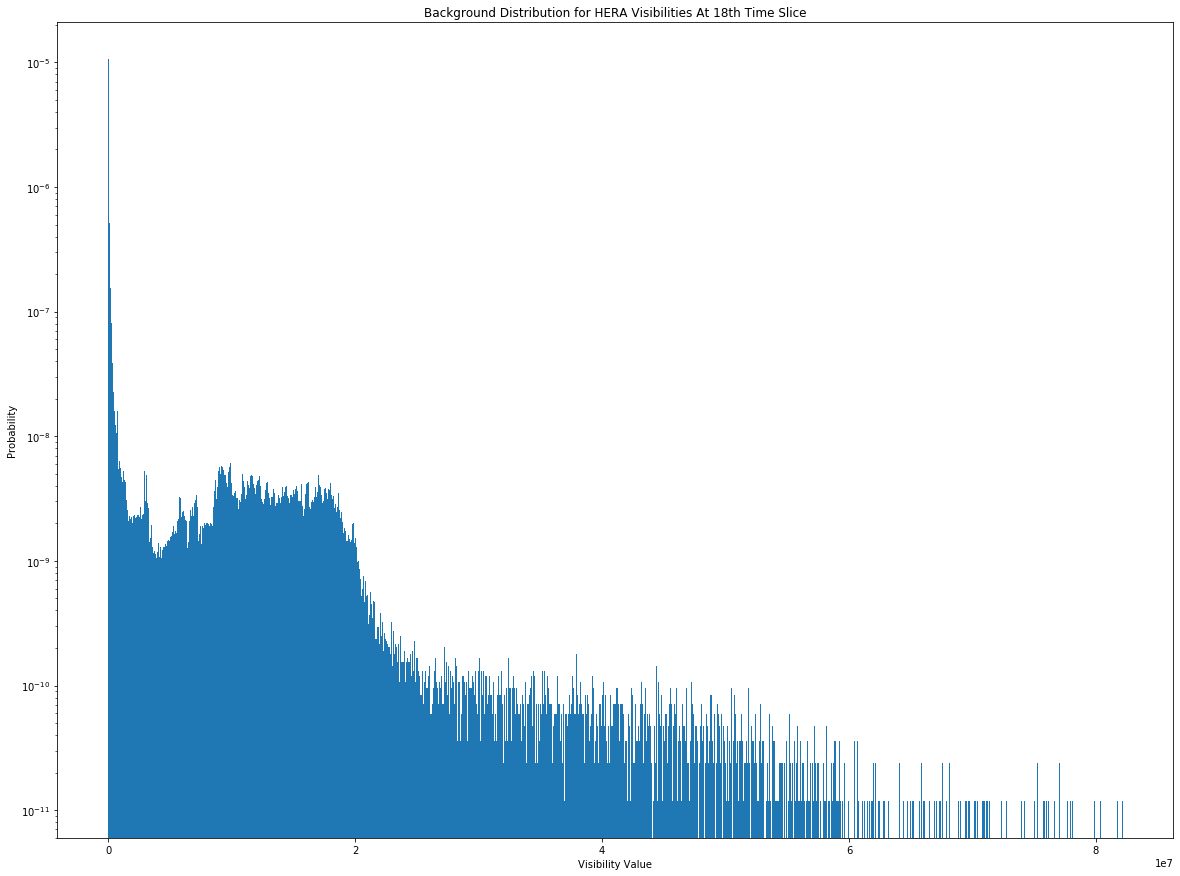

In [23]:
plt.hist(dat1, density = True, bins =1000)
plt.yscale('log')
plt.xlabel('Visibility Value')
plt.ylabel('Probability')
plt.title('Background Distribution for HERA Visibilities At 18th Time Slice')
plt.show()

In [10]:
prob5sigma = 1 - 1/(3.5e6)
print('5 Sigma Value',stats.gamma.ppf(q = prob5sigma, a = 1, loc = 0, scale = 1e7))

5 Sigma Value 150682735.2659742


The 5 sigma visibility value for this data distribution is 1.5e8.

**Problem 2**
**Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.**

**a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.**

**b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?**

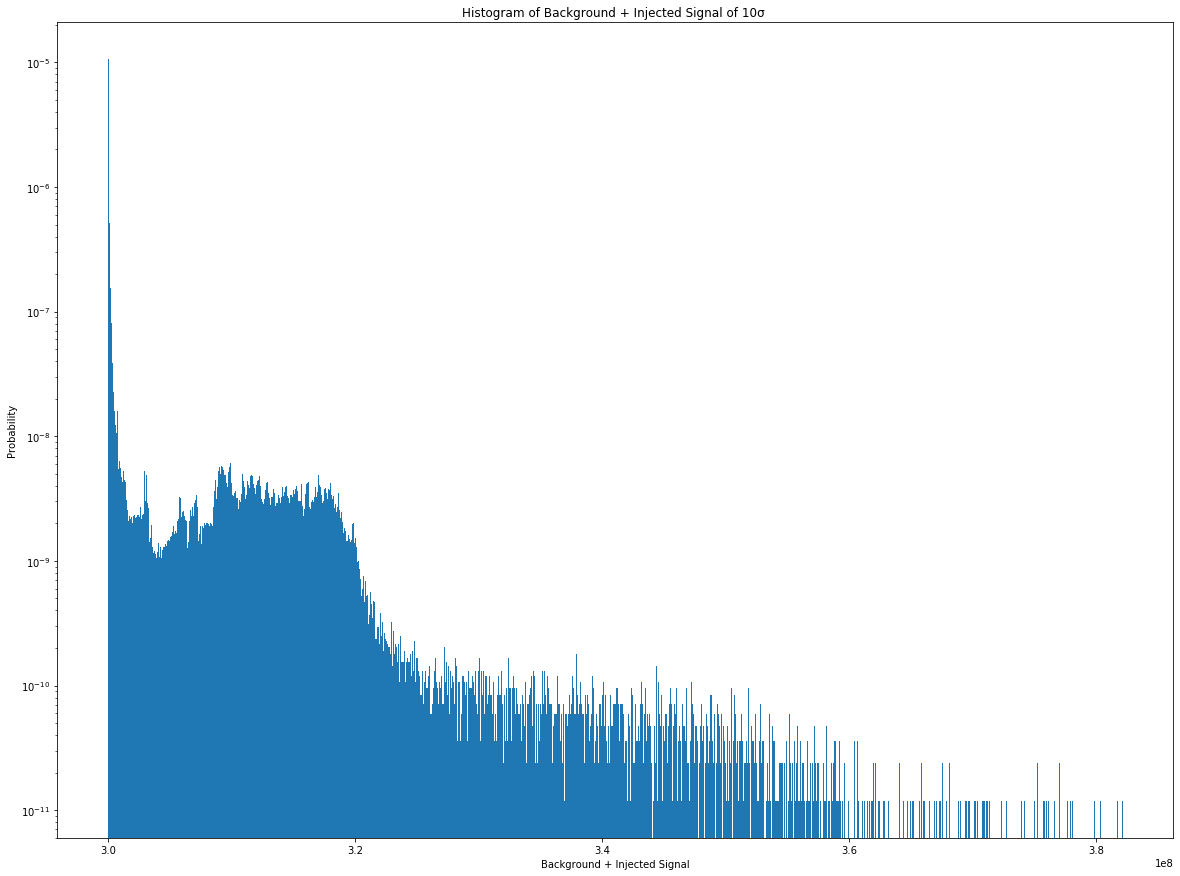

In [75]:
sigknown = 3e8
dat2 = []
for i in range(1022976):
    dat2.append(dat1[i]+sigknown)
plt.hist(dat2, density = True, bins = 1000)
plt.yscale('log')
plt.xlabel('Background + Injected Signal')
plt.ylabel('Probability')
plt.title('Histogram of Background + Injected Signal of 10σ ')
plt.show()